In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./Curstomer Chrun.csv")
print("Number of rows:- " +str(df.shape[0]))
print("Number of cols:- " +str(df.shape[1]))

Number of rows:- 360
Number of cols:- 21


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        360 non-null    object 
 1   gender            360 non-null    object 
 2   SeniorCitizen     360 non-null    int64  
 3   Partner           360 non-null    object 
 4   Dependents        360 non-null    object 
 5   tenure            360 non-null    int64  
 6   PhoneService      360 non-null    object 
 7   MultipleLines     360 non-null    object 
 8   InternetService   360 non-null    object 
 9   OnlineSecurity    360 non-null    object 
 10  OnlineBackup      360 non-null    object 
 11  DeviceProtection  360 non-null    object 
 12  TechSupport       360 non-null    object 
 13  StreamingTV       360 non-null    object 
 14  StreamingMovies   360 non-null    object 
 15  Contract          360 non-null    object 
 16  PaperlessBilling  360 non-null    object 
 1

In [4]:
(yes,no) = df['Churn'].value_counts()
yes_percentage = (yes)/(yes+no)
no_percentage = no/(yes+no)
print(yes_percentage)
print(no_percentage)



0.7381615598885793
0.2618384401114206


In [5]:
# Checking for missing values in the entire dataset
missing_values = df.isnull().sum()

    



In [6]:
# Converting TotalCharges to numeric, forcing errors to NaN (non-numeric values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Impute missing TotalCharges with the median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)




C:\Users\hp\AppData\Local\Temp\ipykernel_16012\2711010318.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [7]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


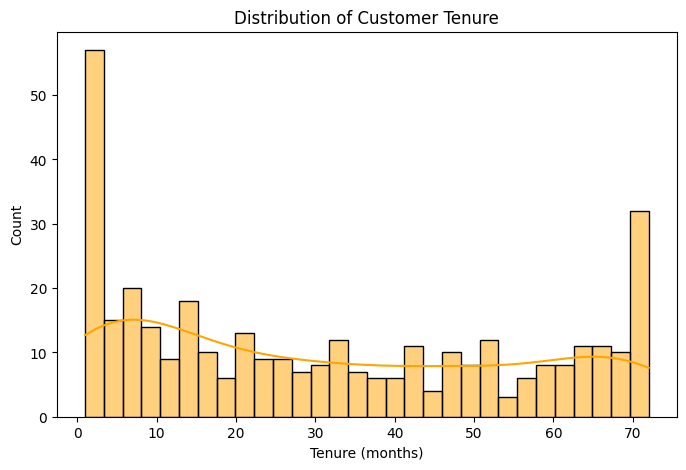

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


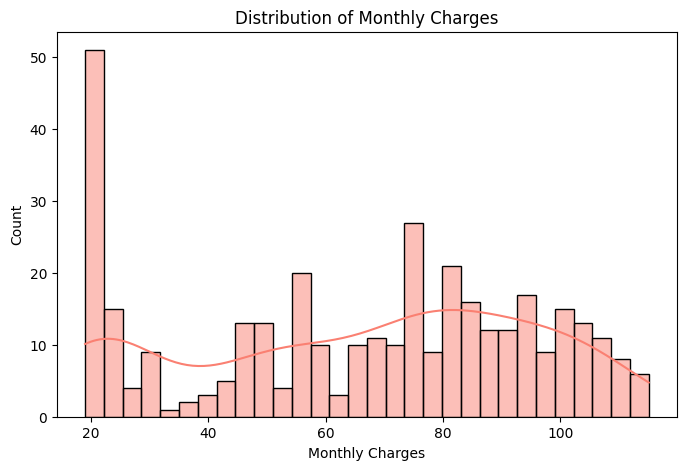

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


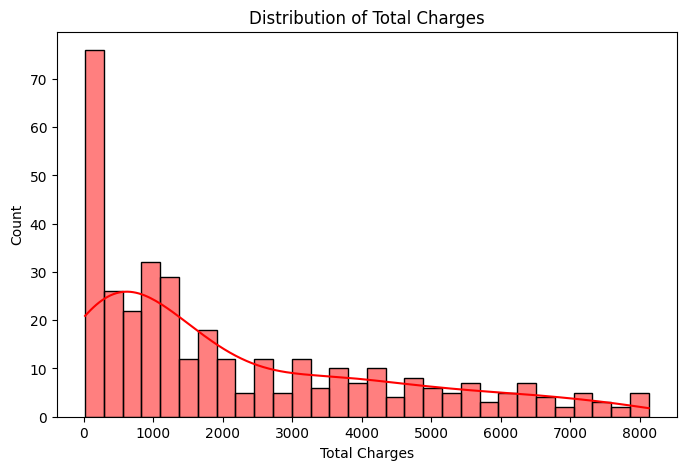

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histogram for Tenure
plt.figure(figsize=(8,5))
sns.histplot(df['tenure'], bins=30, kde=True, color='orange')
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (months)')
plt.show()

# Plotting histogram for Monthly Charges
plt.figure(figsize=(8,5))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['TotalCharges'], bins=30, kde=True, color='red')
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.show()


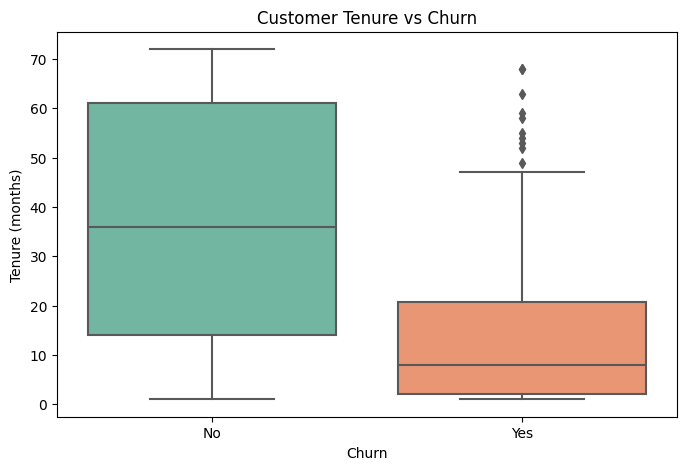

In [9]:
# Boxplot to show distribution of Tenure by Churn
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='tenure', palette='Set2')
plt.title('Customer Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.show()




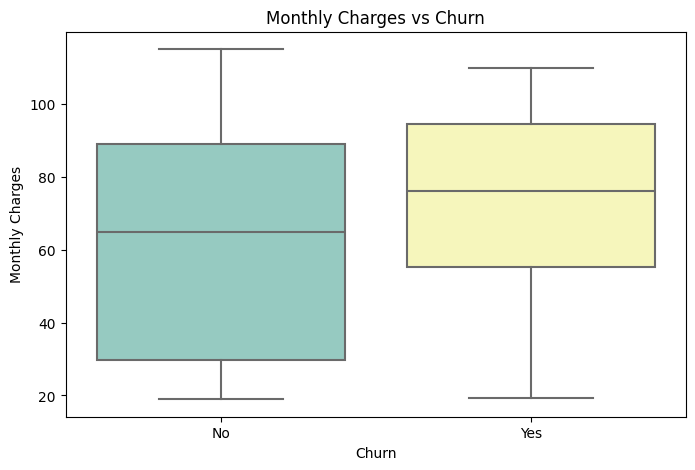

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set3')
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


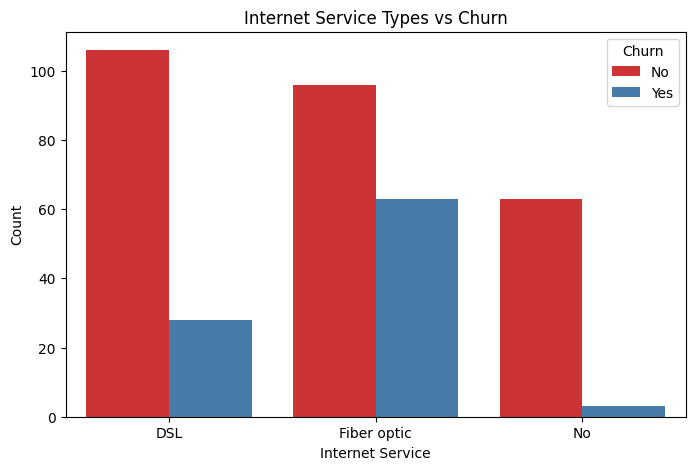

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='Set1')
plt.title('Internet Service Types vs Churn')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

In [12]:
# Apply One-Hot Encoding to all categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop('customerID')
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(df.columns)
df['BothStreamingServices'] = ((df['StreamingTV_Yes'] == True) & (df['StreamingMovies_Yes'] == True)).astype(int)
# df['BothStreamingServices_No'] = ((df['StreamingTV_Yes'] == True) & (df['StreamingMovies_No'] == True)).astype(int)

# Display the first few rows of the new feature
print(df[['StreamingTV_Yes', 'StreamingMovies_Yes', 'BothStreamingServices']].head())


Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')
   StreamingTV_Yes  StreamingMovies_Yes  BothStreamingServices
0            False             

In [13]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Identify the numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Option 1: StandardScaler (standardization)
scaler_standard = StandardScaler()
df[numerical_cols] = scaler_standard.fit_transform(df[numerical_cols])


# Display the first few rows of scaled columns
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             360 non-null    object 
 1   SeniorCitizen                          360 non-null    int64  
 2   tenure                                 360 non-null    float64
 3   MonthlyCharges                         360 non-null    float64
 4   TotalCharges                           360 non-null    float64
 5   gender_Male                            360 non-null    bool   
 6   Partner_Yes                            360 non-null    bool   
 7   Dependents_Yes                         360 non-null    bool   
 8   PhoneService_Yes                       360 non-null    bool   
 9   MultipleLines_No phone service         360 non-null    bool   
 10  MultipleLines_Yes                      360 non-null    bool   
 11  Intern

In [14]:


# Create a new feature representing the average monthly charge over the customer's tenure
# Make sure to avoid division by zero
df['AvgMonthlyCharge'] = df['TotalCharges'] / df['tenure']


# Replace infinite or NaN values caused by division by zero with 0 (or another placeholder if appropriate)
df['AvgMonthlyCharge'].replace([float('inf'), np.nan], 0, inplace=True)

# Display the first few rows of the new feature
print(df[['TotalCharges', 'tenure', 'AvgMonthlyCharge']].head())


   TotalCharges    tenure  AvgMonthlyCharge
0     -1.001317 -1.243451          0.805273
1     -0.145013  0.102903         -1.409219
2     -0.965262 -1.202652          0.802612
3     -0.167461  0.551688         -0.303543
4     -0.945232 -1.202652          0.785957


C:\Users\hp\AppData\Local\Temp\ipykernel_16012\1098529417.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AvgMonthlyCharge'].replace([float('inf'), np.nan], 0, inplace=True)


In [27]:
from sklearn.model_selection import train_test_split

# Define the feature matrix X and the target variable y (assuming 'Churn' is the target column)
# Correct way to drop both 'Churn' and 'customerId' columns
X = df.drop(['Churn_Yes', 'customerID'], axis=1)

y = df['Churn_Yes']

# Perform the train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Check the shapes to confirm the split
print(f'Train set: {X_train.shape}, Test set: {X_test.shape}')
print(X_test.dtypes)



Train set: (288, 32), Test set: (72, 32)
SeniorCitizen                              int64
tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes             

              precision    recall  f1-score   support

       False       0.83      0.94      0.88        51
        True       0.79      0.52      0.63        21

    accuracy                           0.82        72
   macro avg       0.81      0.73      0.75        72
weighted avg       0.82      0.82      0.81        72

Accuracy: 0.8194444444444444
Precision: 0.7857142857142857, Recall: 0.5238095238095238, F1: 0.6285714285714286
ROC-AUC: 0.892623716153128


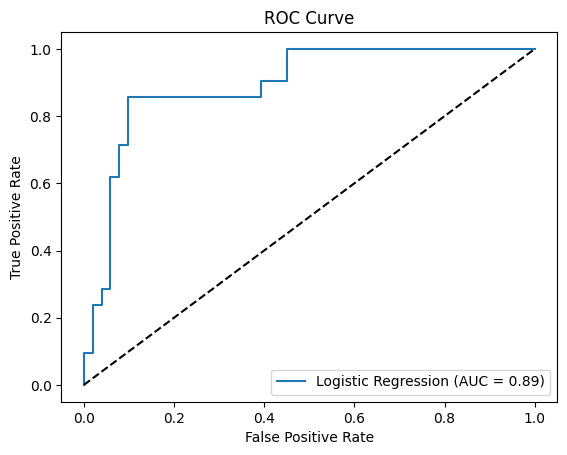

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Initialize the Logistic Regression model
lr_model = LogisticRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred= lr_model.predict(X_test)

print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Precision, Recall, F1
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
print(f"Precision: {precision}, Recall: {recall}, F1: {f1}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:,1])
print(f"ROC-AUC: {roc_auc}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label=f'{"Logistic Regression"} (AUC = {roc_auc:.2f})')

# Plot the ROC Curve for all models
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


              precision    recall  f1-score   support

       False       0.82      0.90      0.86        51
        True       0.69      0.52      0.59        21

    accuracy                           0.79        72
   macro avg       0.75      0.71      0.73        72
weighted avg       0.78      0.79      0.78        72

Accuracy: 0.7916666666666666
Precision: 0.6875, Recall: 0.5238095238095238, F1: 0.5945945945945946
ROC-AUC: 0.8506069094304388


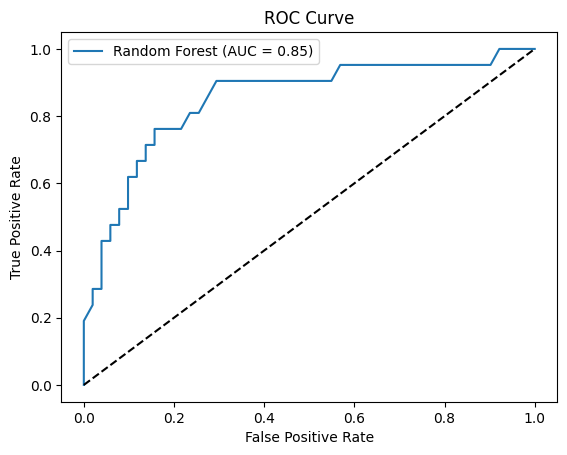

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)


print(classification_report(y_test, y_pred_rf))

# Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")

# Precision, Recall, F1
precision = precision_score(y_test, y_pred_rf, average='binary')
recall = recall_score(y_test, y_pred_rf, average='binary')
f1 = f1_score(y_test, y_pred_rf, average='binary')
print(f"Precision: {precision}, Recall: {recall}, F1: {f1}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
print(f"ROC-AUC: {roc_auc}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label=f'{"Random Forest"} (AUC = {roc_auc:.2f})')

# Plot the ROC Curve for all models
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()



              precision    recall  f1-score   support

       False       0.82      0.92      0.87        51
        True       0.73      0.52      0.61        21

    accuracy                           0.81        72
   macro avg       0.78      0.72      0.74        72
weighted avg       0.80      0.81      0.79        72

Accuracy: 0.8055555555555556
Precision: 0.7333333333333333, Recall: 0.5238095238095238, F1: 0.6111111111111112
ROC-AUC: 0.8566760037348272


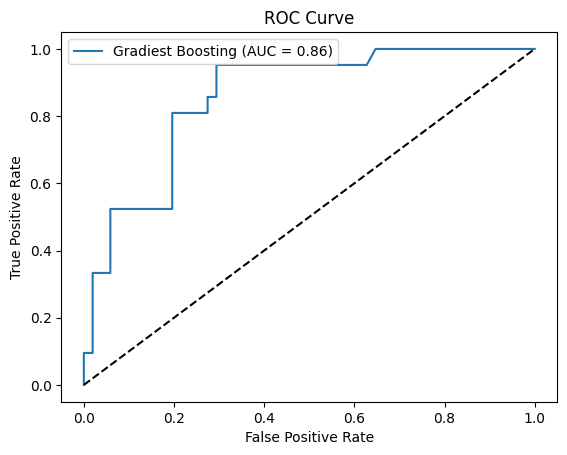

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Calculate accuracy

print(classification_report(y_test, y_pred_gb))

# Accuracy
accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy: {accuracy}")

# Precision, Recall, F1
precision = precision_score(y_test, y_pred_gb, average='binary')
recall = recall_score(y_test, y_pred_gb, average='binary')
f1 = f1_score(y_test, y_pred_gb, average='binary')
print(f"Precision: {precision}, Recall: {recall}, F1: {f1}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:,1])
print(f"ROC-AUC: {roc_auc}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label=f'{"Gradiest Boosting"} (AUC = {roc_auc:.2f})')

# Plot the ROC Curve for all models
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()




              precision    recall  f1-score   support

       False       0.86      0.94      0.90        51
        True       0.81      0.62      0.70        21

    accuracy                           0.85        72
   macro avg       0.83      0.78      0.80        72
weighted avg       0.84      0.85      0.84        72

Accuracy: 0.8472222222222222
Precision: 0.8125, Recall: 0.6190476190476191, F1: 0.7027027027027027
ROC-AUC: 0.8972922502334266


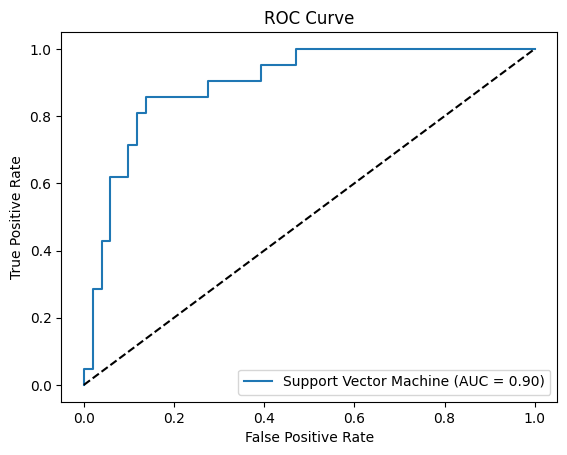

In [19]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42,probability=True)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)


print(classification_report(y_test, y_pred_svm))

# Accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy}")

# Precision, Recall, F1
precision = precision_score(y_test, y_pred_svm, average='binary')
recall = recall_score(y_test, y_pred_svm, average='binary')
f1 = f1_score(y_test, y_pred_svm, average='binary')
print(f"Precision: {precision}, Recall: {recall}, F1: {f1}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:,1])
print(f"ROC-AUC: {roc_auc}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, svm_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label=f'{"Support Vector Machine"} (AUC = {roc_auc:.2f})')

# Plot the ROC Curve for all models
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()





              precision    recall  f1-score   support

       False       0.84      0.80      0.82        51
        True       0.57      0.62      0.59        21

    accuracy                           0.75        72
   macro avg       0.70      0.71      0.71        72
weighted avg       0.76      0.75      0.75        72

Accuracy: 0.75
Precision: 0.5652173913043478, Recall: 0.6190476190476191, F1: 0.5909090909090909
ROC-AUC: 0.792717086834734


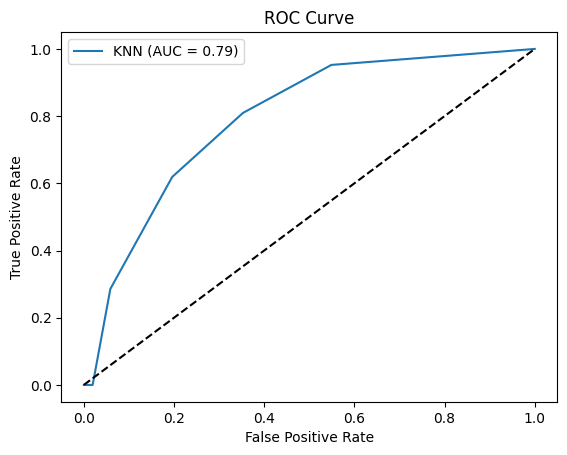

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)


print(classification_report(y_test, y_pred_knn))

# Accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy}")

# Precision, Recall, F1
precision = precision_score(y_test, y_pred_knn, average='binary')
recall = recall_score(y_test, y_pred_knn, average='binary')
f1 = f1_score(y_test, y_pred_knn, average='binary')
print(f"Precision: {precision}, Recall: {recall}, F1: {f1}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:,1])
print(f"ROC-AUC: {roc_auc}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label=f'{"KNN"} (AUC = {roc_auc:.2f})')

# Plot the ROC Curve for all models
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()






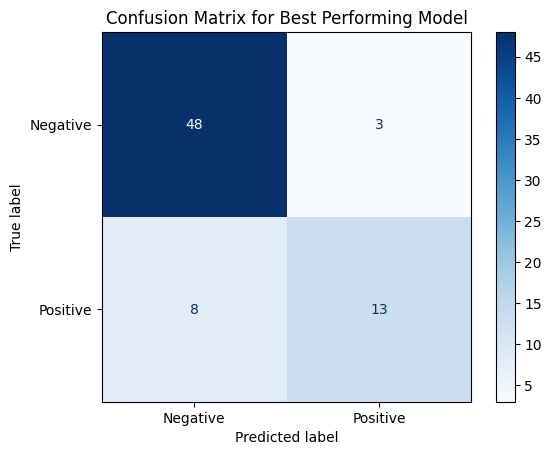

True Negatives: 48
False Positives: 3
False Negatives: 8
True Positives: 13
Accuracy: 0.8472
Precision: 0.8125
Recall: 0.6190
F1 Score: 0.7027


In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test are the true labels and y_pred_best are the predictions from your best model
y_pred_best = svm_model.predict(X_test)  # Replace svm_model with your best model variable

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Best Performing Model')
plt.show()

# Analyze the confusion matrix
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


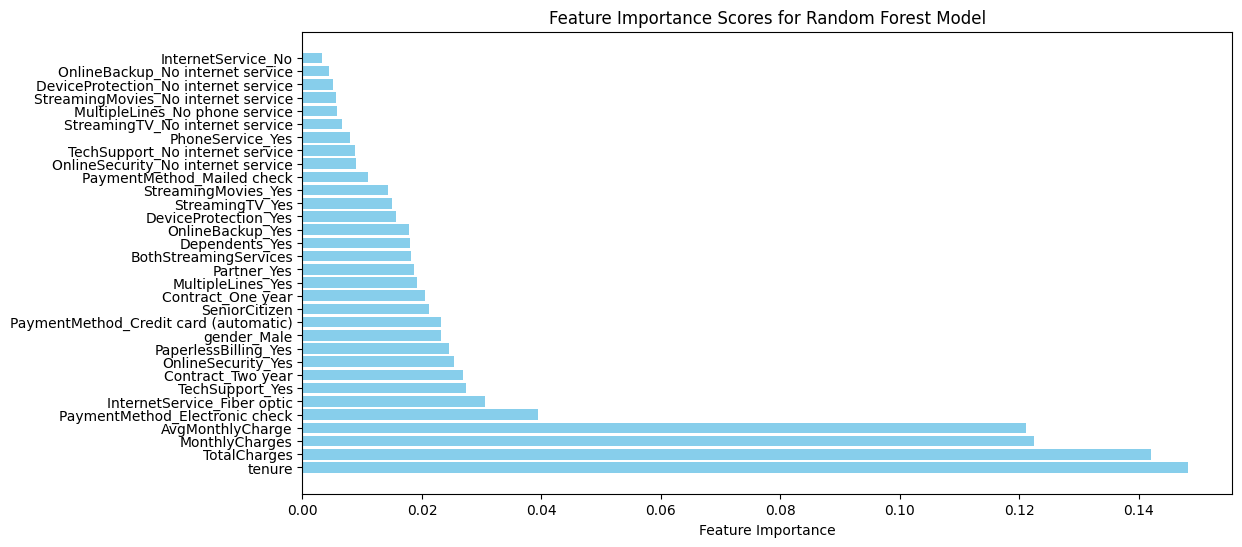

Top Features for Random Forest:
                                  Feature  Importance
11                     InternetService_No    0.003237
14       OnlineBackup_No internet service    0.004467
16   DeviceProtection_No internet service    0.005035
22    StreamingMovies_No internet service    0.005634
8          MultipleLines_No phone service    0.005794
20        StreamingTV_No internet service    0.006536
7                        PhoneService_Yes    0.008022
18        TechSupport_No internet service    0.008778
12     OnlineSecurity_No internet service    0.009033
29             PaymentMethod_Mailed check    0.010947
23                    StreamingMovies_Yes    0.014340
21                        StreamingTV_Yes    0.015016
17                   DeviceProtection_Yes    0.015590
15                       OnlineBackup_Yes    0.017751
6                          Dependents_Yes    0.017925
30                  BothStreamingServices    0.018225
5                             Partner_Yes    0.018

In [22]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X_train and y_train are your training data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance scores
importances = rf_model.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# Plotting the feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Scores for Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

# Display the top features
print("Top Features for Random Forest:")
print(feature_importance_df)


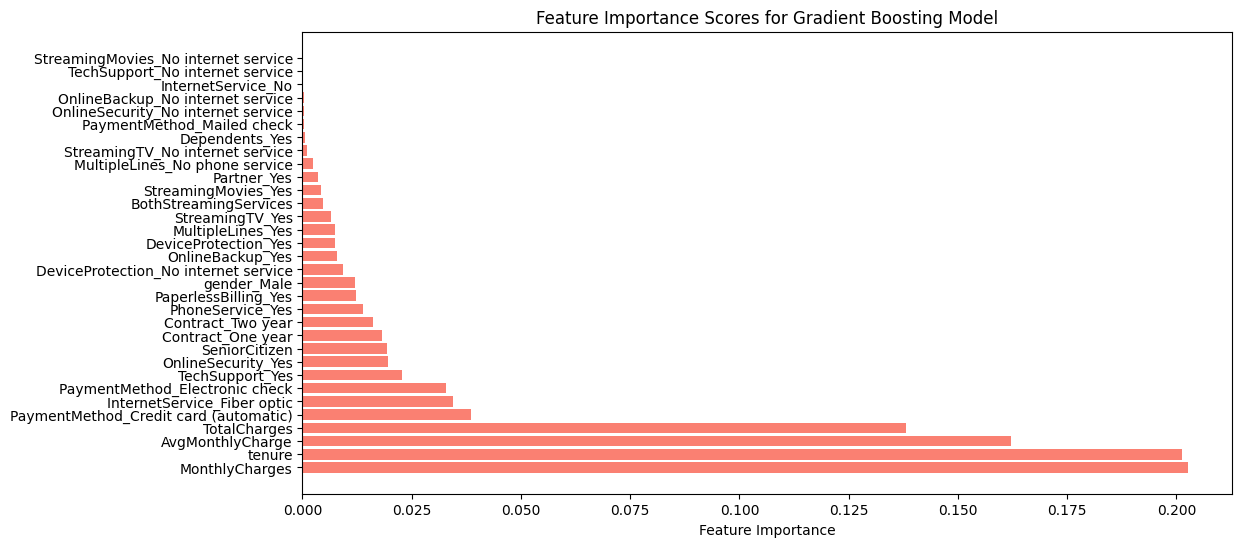

Top Features for Gradient Boosting:
                                  Feature  Importance
22    StreamingMovies_No internet service    0.000000
18        TechSupport_No internet service    0.000000
11                     InternetService_No    0.000000
14       OnlineBackup_No internet service    0.000250
12     OnlineSecurity_No internet service    0.000286
29             PaymentMethod_Mailed check    0.000296
6                          Dependents_Yes    0.000532
20        StreamingTV_No internet service    0.001143
8          MultipleLines_No phone service    0.002470
5                             Partner_Yes    0.003604
23                    StreamingMovies_Yes    0.004199
30                  BothStreamingServices    0.004618
21                        StreamingTV_Yes    0.006421
9                       MultipleLines_Yes    0.007341
17                   DeviceProtection_Yes    0.007375
15                       OnlineBackup_Yes    0.008014
16   DeviceProtection_No internet service    0

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Get feature importance scores
gb_importances = gb_model.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
gb_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_importances
}).sort_values(by='Importance', ascending=True)

# Plotting the feature importances
plt.figure(figsize=(12, 6))
plt.barh(gb_feature_importance_df['Feature'], gb_feature_importance_df['Importance'], color='salmon')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Scores for Gradient Boosting Model')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

# Display the top features
print("Top Features for Gradient Boosting:")
print(gb_feature_importance_df)


In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# Define the SVM model
svm_model = SVC()

# Define the hyperparameter distribution for RandomizedSearchCV
param_dist = {
    'C': [0.1, 1, 10, 100, 1000,10000],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001, 0.0001],  # Kernel coefficient
    'degree': [2, 3, 4,5]  # Degree for polynomial kernel
}

# Initialize RandomizedSearchCV
random_search_svm = RandomizedSearchCV(estimator=svm_model, param_distributions=param_dist, 
                                       n_iter=50, scoring='accuracy', cv=5, verbose=2, n_jobs=-1, random_state=42)

# Fit the random search to the data
random_search_svm.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_svm_random = random_search_svm.best_params_
best_score_svm_random = random_search_svm.best_score_

print(f"Best Hyperparameters (RandomizedSearchCV): {best_params_svm_random}")
print(f"Best Cross-Validation Score: {best_score_svm_random:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters (RandomizedSearchCV): {'kernel': 'rbf', 'gamma': 0.0001, 'degree': 2, 'C': 1000}
Best Cross-Validation Score: 0.8091


In [25]:
best_svm_model_random = random_search_svm.best_estimator_
y_pred_best_svm_random = best_svm_model_random.predict(X_test)
print("\nClassification Report for Best SVM Model (RandomizedSearchCV):")
print(classification_report(y_test, y_pred_best_svm_random))

accuracy = accuracy_score(y_test, y_pred_best_svm_random)
print(f"Accuracy: {accuracy}")


Classification Report for Best SVM Model (RandomizedSearchCV):
              precision    recall  f1-score   support

       False       0.84      0.94      0.89        51
        True       0.80      0.57      0.67        21

    accuracy                           0.83        72
   macro avg       0.82      0.76      0.78        72
weighted avg       0.83      0.83      0.82        72

Accuracy: 0.8333333333333334


In [26]:
import pickle

# Save the model using pickle
with open('models/best_model.pkl', 'wb') as f:
    pickle.dump(best_svm_model_random, f)

print(f"Model saved as models/best_model.pkl")


Model saved as models/best_model.pkl
